In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df_article = pd.read_csv('data/articles.csv')
transactions= pd.read_csv('data/transactions_train.csv')
df_article.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [40]:
df_article.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [41]:
print(df_article.isnull().sum())

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64


In [42]:
null_rows = df_article[df_article.isnull().any(axis=1)]
# Displaying the details of rows with null values
print(null_rows)

       article_id  product_code                   prod_name  product_type_no  \
1467    351332007        351332        Marshall Lace up Top              252   
2644    420049002        420049                  OL TAGE PQ               87   
2645    420049003        420049                  OL TAGE PQ               87   
2742    426199002        426199  Ellen Shortie Daisy Low 3p              286   
2743    426199010        426199  Ellen Shortie Daisy Low 3p              286   
...           ...           ...                         ...              ...   
67838   752458001        752458           Poissy boho dress              265   
72720   768842001        768842                 Andrews set              270   
72721   768842004        768842                 Andrews set              270   
93144   856985001        856985                   Pogo rope               67   
95624   867200001        867200              Necklace Simon               77   

      product_type_name  product_group_

In [43]:
#filling the null values in details column with "No description available"
df_article['detail_desc'].fillna('No description available', inplace=True)
print(df_article[df_article.isnull().any(axis=1)])

Empty DataFrame
Columns: [article_id, product_code, prod_name, product_type_no, product_type_name, product_group_name, graphical_appearance_no, graphical_appearance_name, colour_group_code, colour_group_name, perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name, department_no, department_name, index_code, index_name, index_group_no, index_group_name, section_no, section_name, garment_group_no, garment_group_name, detail_desc]
Index: []

[0 rows x 25 columns]


In [44]:
#unique product codes
df_article['product_code'].nunique()

47224

In [45]:
#unique clothing options  
df_article['product_type_no'].nunique()

132

In [46]:
unique_colors = df_article['perceived_colour_master_name'].unique()

# Print the unique colors
print("Unique Colors:")
for color in unique_colors:
    print(color)

Unique Colors:
Black
White
Beige
Grey
Blue
Pink
Lilac Purple
Red
Mole
Orange
Metal
Brown
Turquoise
Yellow
Khaki green
Green
undefined
Unknown
Yellowish Green
Bluish Green


In [47]:
unique_products = df_article['product_group_name'].unique()

# Print the unique products
print("Unique products:")
for n in unique_products:
    print(n)

Unique products:
Garment Upper body
Underwear
Socks & Tights
Garment Lower body
Accessories
Items
Nightwear
Unknown
Underwear/nightwear
Shoes
Swimwear
Garment Full body
Cosmetic
Interior textile
Bags
Furniture
Garment and Shoe care
Fun
Stationery


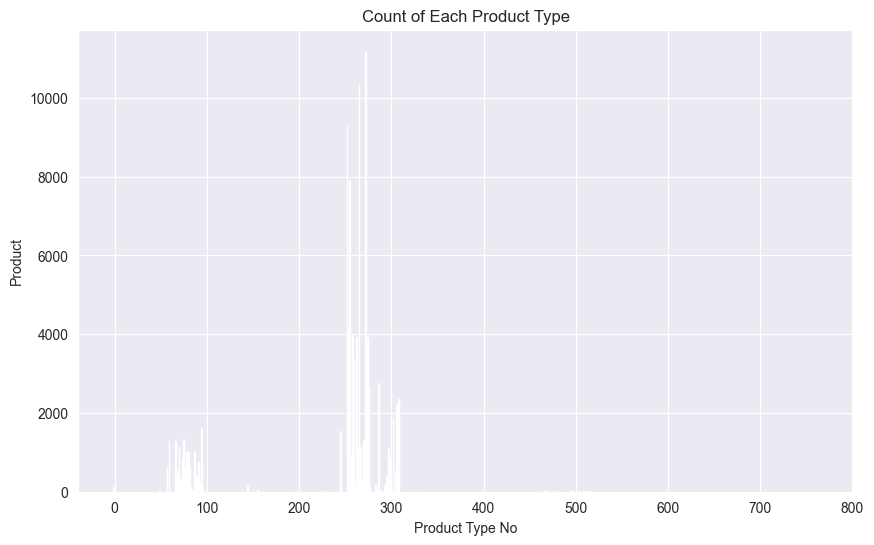

In [48]:

#count the unique number of products in product codes for each product type
Countproduct_for_product_type = df_article.groupby('product_type_no')['product_code'].count()
plt.figure(figsize=(10, 6))
plt.bar(Countproduct_for_product_type.index, Countproduct_for_product_type.values, color='green')
plt.xlabel('Product Type No')
plt.ylabel('Product')
plt.title('Count of Each Product Type')
plt.show()

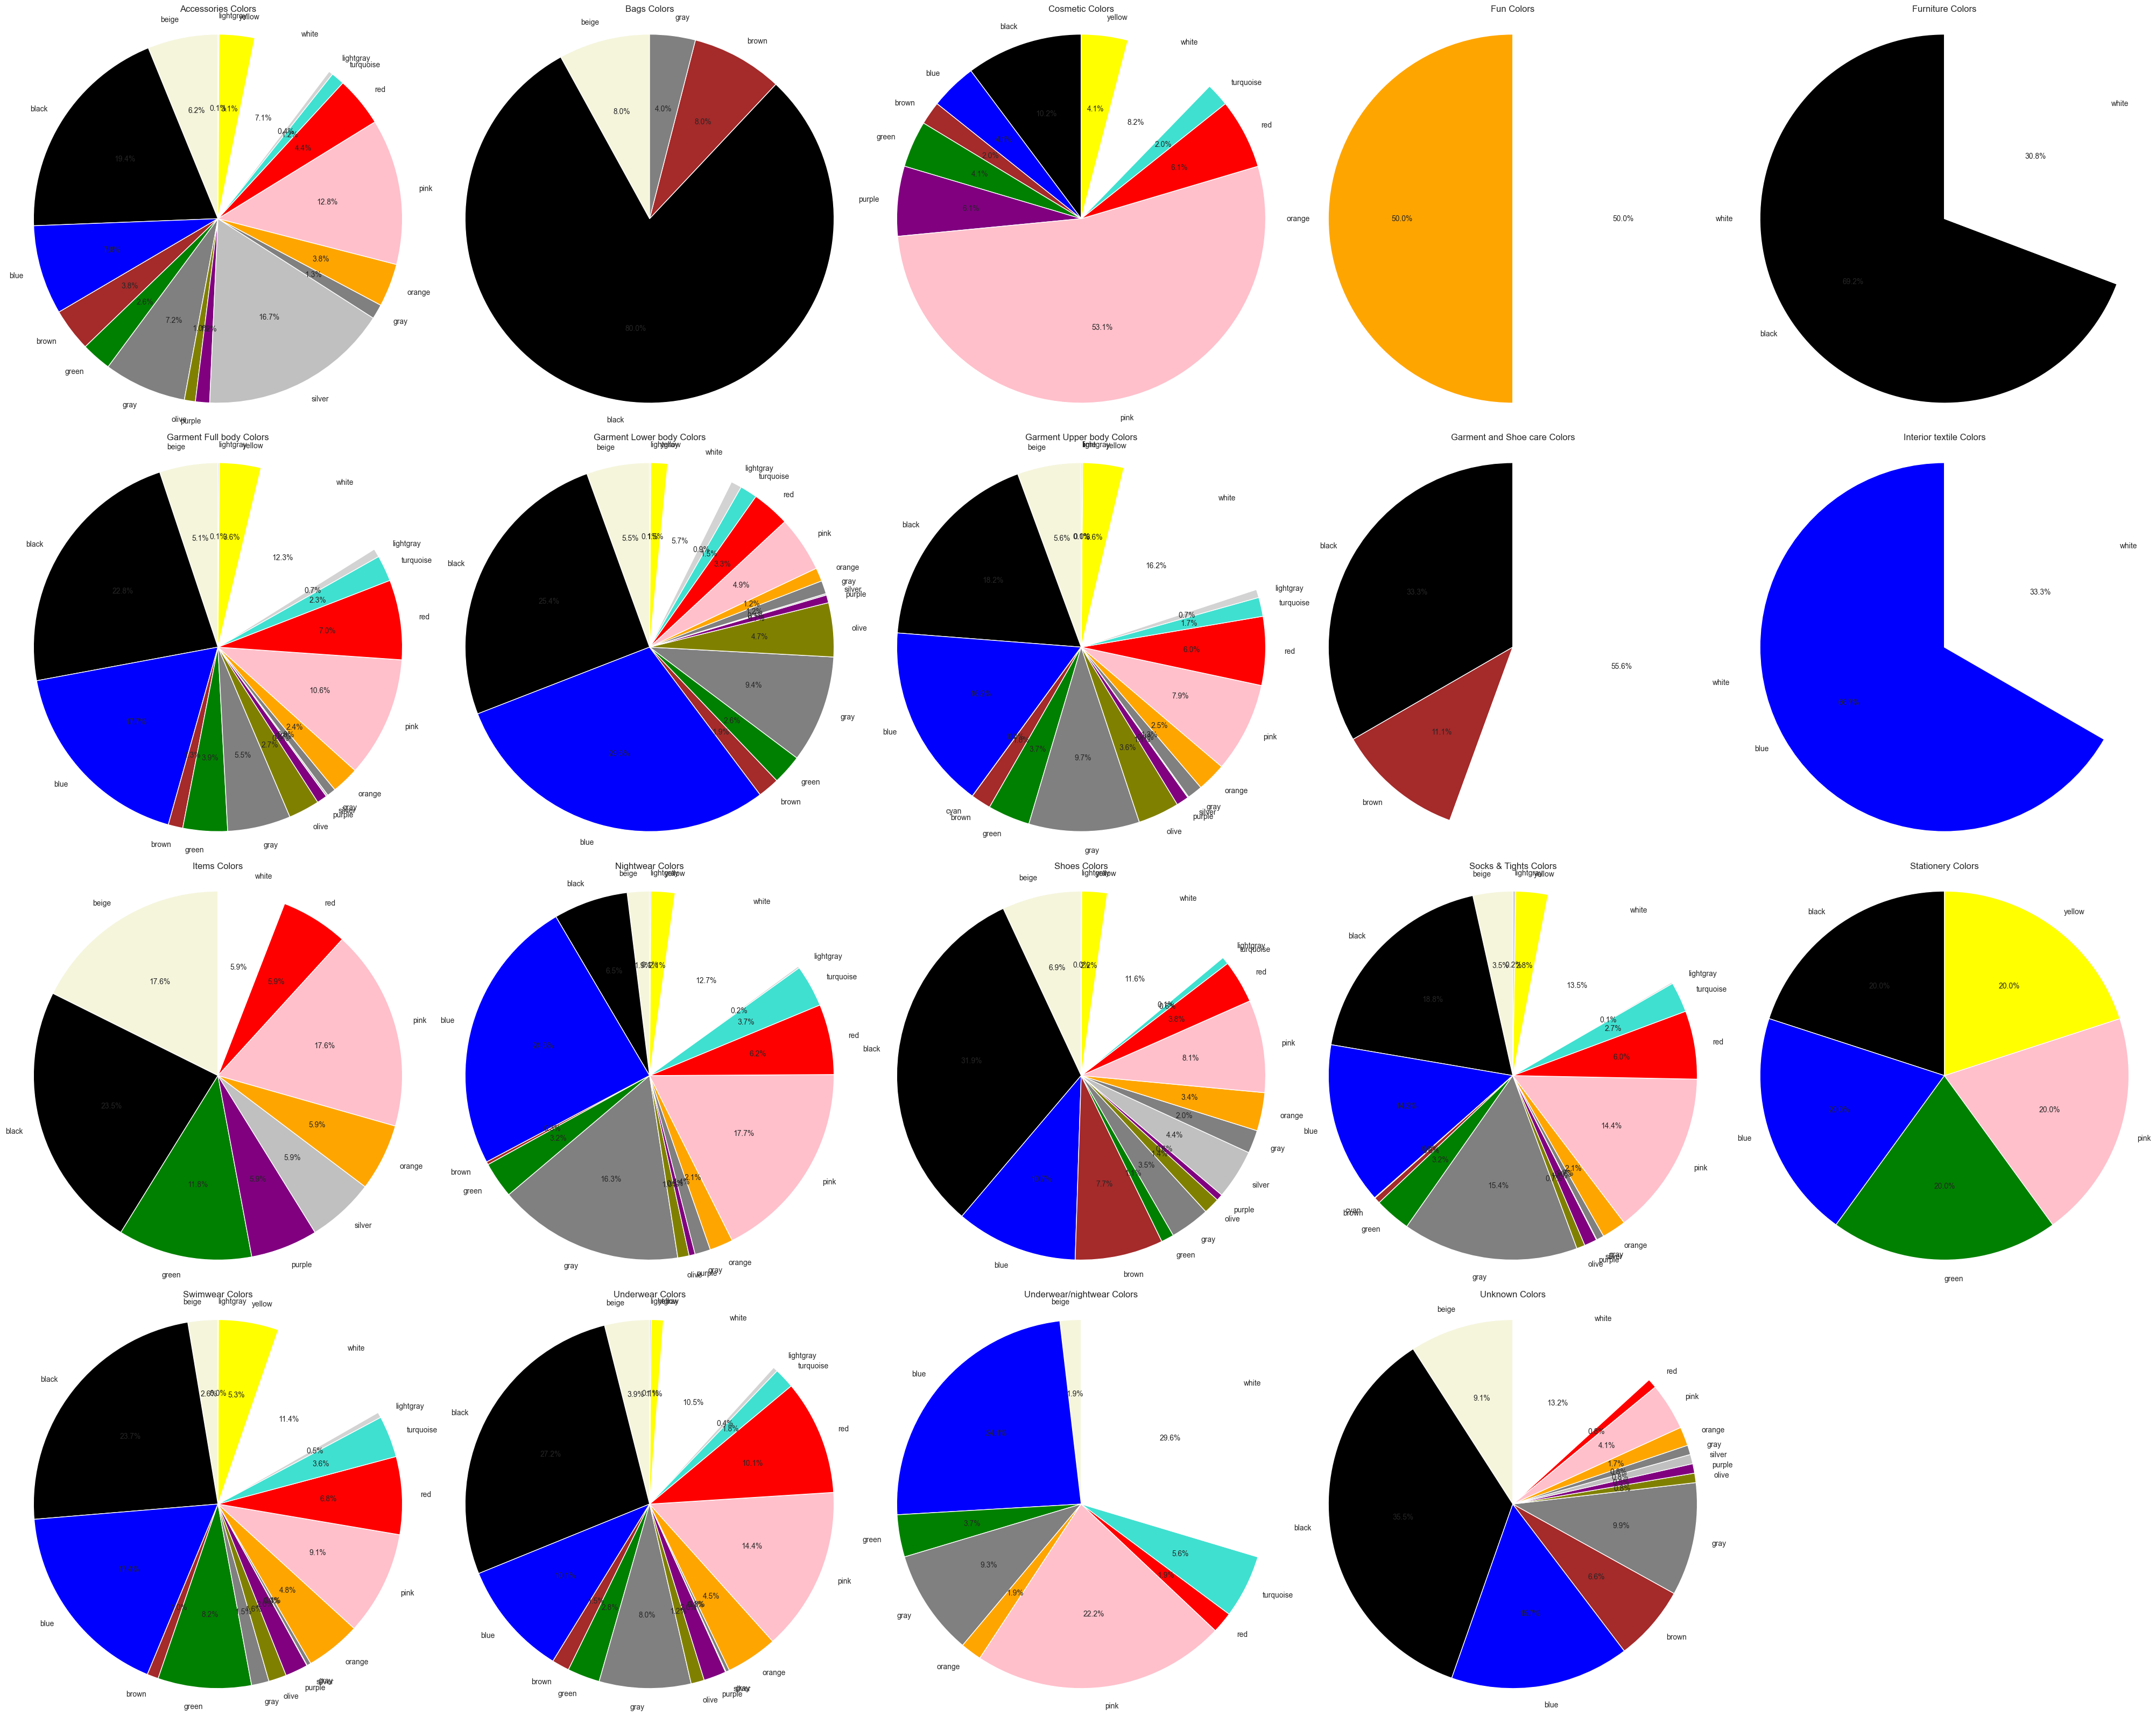

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Group by 'product_group_name' and 'perceived_colour_master_name' and count the occurrences
counts = df_article.groupby(['product_group_name', 'perceived_colour_master_name']).size().reset_index(name='count')

# Initialize the dictionary to hold the counts for each product group
product_group_counts = {}

# Populate the dictionary
for _, row in counts.iterrows():
    if row['product_group_name'] not in product_group_counts:
        product_group_counts[row['product_group_name']] = {}
    product_group_counts[row['product_group_name']][row['perceived_colour_master_name']] = row['count']

# Define the color mapping
color_mapping = {
    'Black': 'black',
    'White': 'white',
    'Beige': 'beige',
    'Grey': 'gray',
    'Blue': 'blue',
    'Pink': 'pink',
    'Lilac Purple': 'purple',
    'Red': 'red',
    'Mole': 'gray',
    'Orange': 'orange',
    'Metal': 'silver',
    'Brown': 'brown',
    'Turquoise': 'turquoise',
    'Yellow': 'yellow',
    'Khaki green': 'olive',
    'Green': 'green',
    'undefined': 'lightgray',
    'Unknown': 'lightgray',
    'Yellowish Green': 'lime',
    'Bluish Green': 'cyan'
}

# Calculate the number of rows and columns for the subplot grid
num_product_groups = len(product_group_counts)
num_rows = int(np.sqrt(num_product_groups))  # Square root of the number of product groups for rows
num_cols = int(np.ceil(num_product_groups / num_rows))  # Ceiling division to get the number of columns

# Create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 8, num_rows * 8))  # Adjust the size accordingly

# If only one row and one column, axs is not an array, but a single object
if num_product_groups == 1:
    axs = [axs]

# Flatten the axes array for easy iteration if there's more than one row or column
elif num_rows > 1 or num_cols > 1:
    axs = axs.flatten()

# Plot each pie chart in its respective subplot
for i, (product_group, counts) in enumerate(product_group_counts.items()):
    # Get the colors for the current product group, use a default color if not found in the mapping
    colors = [color_mapping.get(color , 'lightgray') for color in counts.keys()]
    sizes = list(counts.values())
    axs[i].pie(sizes, labels=colors, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
    axs[i].set_title(f'{product_group} Colors')

# Turn off any remaining subplots that aren't used
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

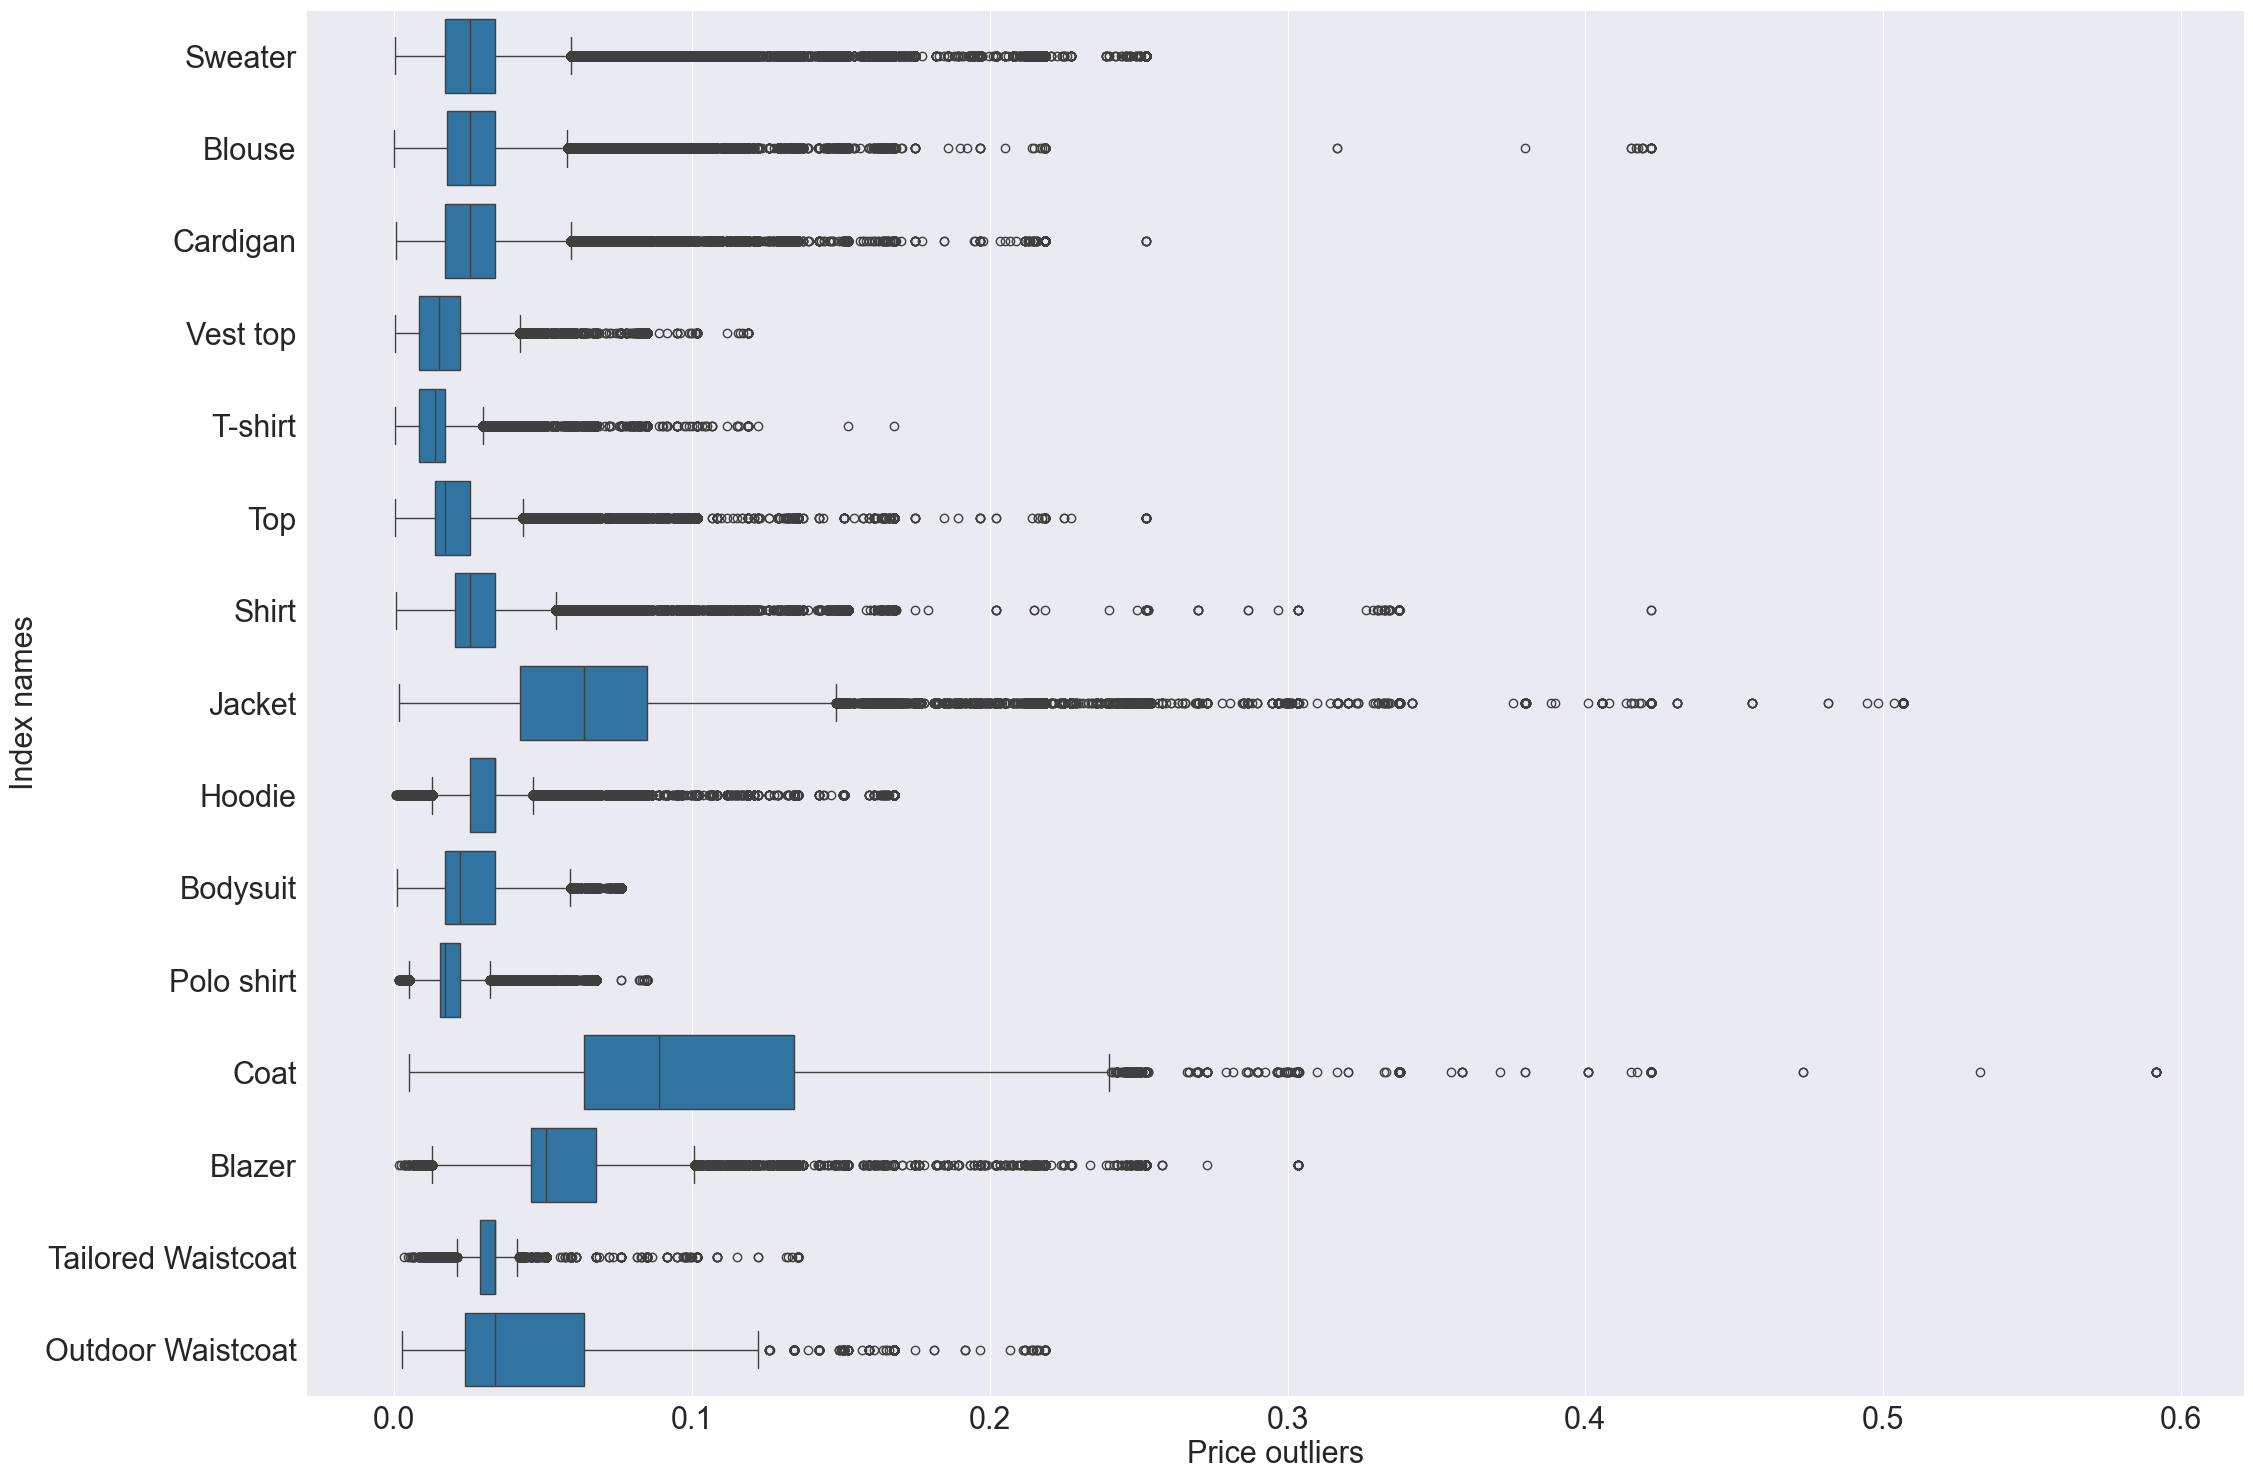

In [50]:
articles_for_merge = df_article[['article_id', 'prod_name','product_type_name', 'product_group_name', 'index_name']]
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Garment Upper body']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()